In [24]:
import numpy as np
import matplotlib.pyplot as plt

# def multinomial_basis(x, feature_num=10):
#     x = np.expand_dims(x, axis=1) # shape(N, 1)
#     feat = [x]
#     for i in range(2, feature_num + 1):
#         feat.append(x ** i)
#     ret = np.concatenate(feat, axis=1)
#     return ret

# def gaussian_basis(x, feature_num=10):
#     centers = np.linspace(0, 25, feature_num)
#     width = 1.0 * (centers[1] - centers[0])
#     x = np.expand_dims(x, axis=1)
#     x = np.concatenate([x] * feature_num, axis=1)
#     out = (x - centers) / width
#     ret = np.exp(-0.5 * out ** 2)
#     return ret

def load_data(filename):
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        xs, ys = np.asarray(xs), np.asarray(ys)

        o_x, o_y = xs, ys
        phi0 = np.expand_dims(np.ones_like(xs), axis=1)
        phi1 = np.expand_dims(xs, axis=1)
        # phi1 = gaussian_basis(xs)
        xs = np.concatenate([phi0, phi1], axis=1)
        return (np.float32(xs), np.float32(ys)), (o_x, o_y)

In [25]:
import tensorflow as tf
from keras import optimizers, Model

class LinearModel(Model):
    def __init__(self, ndim):
        super(LinearModel, self).__init__()
        self.w = tf.Variable(
            shape=[ndim, 1],
            initial_value=tf.random.uniform(
                [ndim, 1], minval=-0.1, maxval=0.1, dtype=tf.float32
            )
        )
    
    @tf.function
    def call(self, x):
        y = tf.squeeze(tf.matmul(x, self.w), axis=1)
        return y
    
(xs, ys), (o_x, o_y) = load_data("train.txt")

model = LinearModel(ndim=xs.shape[1])

In [26]:
optimizer = optimizers.Adam(0.1)

@tf.function
def train_in_one_step(model, xs, ys):
    with tf.GradientTape() as tape:
        y_preds = model(xs)
        loss = tf.reduce_mean(tf.sqrt(1e-12 + (ys - y_preds) ** 2))
    grads = tape.gradient(loss, model.w)
    optimizer.apply_gradients([(grads, model.w)])
    return loss

@tf.function
def predict(model, xs):
    y_preds = model(xs)
    return y_preds

def evaluate(ys, y_pred):
    std = np.sqrt(np.mean(np.abs(ys - y_pred) ** 2))
    return std

loss is 9.869
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.787
loss is 1.785
loss is 1.785
loss is 1.787
loss is 1.785
loss is 1.785
loss is 1.787
loss is 1.787
loss is 1.785
loss is 1.786
loss is 1.787
loss is 1.786
loss is 1.787
loss is 1.785
loss is 1.786
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.786
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.786
loss is 1.787
loss is 1.787
loss is 1.785
loss is 1.786
loss is 1.785
loss is 1.786
loss is 1.785
loss is 1.786
loss is 1.787
loss is 1.786
loss is 1.786
loss is 1.787
loss is 1.785
loss is 1.785
loss is 1.787
loss is 1.789
loss is 1.785
loss is 1.787
loss is 1.786
loss is 1.785
loss is 1.785
loss is 1.785
loss is 1.786
loss is 1.785
loss is 1.785
loss is 1.786
loss is 1.785
loss is 1.787
loss is 1.785
loss is 1.786
loss is 1.79
loss is 1.787
loss is 1.785
loss is 1.787
loss is 1.785
loss is

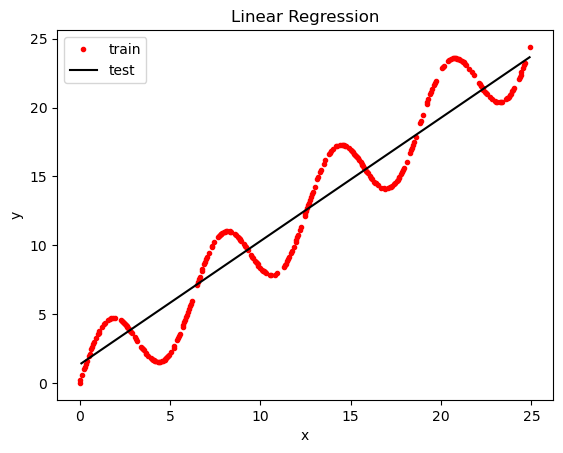

In [27]:
for i in range(10000):
    loss = train_in_one_step(model, xs, ys)
    if i % 100 == 1:
        print(f"loss is {loss:.4}")

y_preds = predict(model, xs)
std = evaluate(ys, y_preds)
print("训练集预测值与真实值的标准差: {:.1f}".format(std))

(xs_test, ys_test), (o_x_test, o_y_test) = load_data("test.txt")
y_test_preds = predict(model,xs_test)
std = evaluate(ys_test, y_test_preds)
print("训练集预测值与真实值的标准差: {:.1f}".format(std))

plt.plot(o_x, o_y, 'ro', markersize=3)
plt.plot(o_x_test, y_test_preds, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend(['train', 'test', 'pred'])
plt.show()